In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('Display.max_columns', None)
pd.set_option('Display.width', 400)
sns.set(rc={'figure.figsize':(12,8)})

In [ ]:
df = pd.read_csv("/AB_NYC_2019.csv")

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
def check_df(dataframe,head=7):
    print("---------- Shape ----------")
    print(dataframe.shape)
    print("---------- Types ----------")
    print(dataframe.dtypes)
    print("---------- Head ----------")
    print(dataframe.head(head))
    print("---------- Tail ----------")
    print(dataframe.tail(head))
    print("---------- NA( Null Değer Toplamı ) ----------")
    print(dataframe.isnull().sum())
    print("---------- Quantiles( Dağılım Bilgisi ) ----------")
    print(dataframe.describe([0,0.05,0.50,0.95,0.99,1]).T)
    """
    print("---------- Gözlem Birimi Detayları ----------")
    for i in dataframe.columns:
       print("--------------" + i + "------------- ")
        print(dataframe[i].value_counts())
        print("\n")
    """

In [ ]:
check_df(df)

---------- Shape ----------
(48895, 16)
---------- Types ----------
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
---------- Head ----------
     id                                              name  host_id    host_name neighbourhood_group neighbourhood  latitude  longitude        room_type  price  minimum_nights  number_of_reviews last_review  reviews_per_

In [ ]:
category_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

In [ ]:
category_cols

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [ ]:
numerical_but_category = [col for col in df.columns if df[col].nunique() <15 and df[col].dtypes in ["int64", "float64"]]

In [ ]:
numerical_but_category

[]

In [ ]:
category_but_cardinal = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

In [ ]:
category_but_cardinal

['name', 'host_name', 'neighbourhood', 'last_review']

In [ ]:
category_cols = [col for col in category_cols if col not in category_but_cardinal]

In [ ]:
category_cols + numerical_but_category

['neighbourhood_group', 'room_type']

In [ ]:
numerical_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]

In [ ]:
numerical_cols = [col for col in numerical_cols if col not in numerical_but_category]

In [ ]:
df[numerical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 3.7 MB


In [ ]:
df[category_cols].nunique()

neighbourhood_group    5
room_type              3
dtype: int64

In [ ]:
df[category_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood_group  48895 non-null  object
 1   room_type            48895 non-null  object
dtypes: object(2)
memory usage: 764.1+ KB


In [ ]:
df["neighbourhood_group"].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
df["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
def category_summary(dataframe,col_name,plot=False):
    print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                        "Ratio" : 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("----------------------------------")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

               neighbourhood_group      Ratio
Manhattan                    21661  44.301053
Brooklyn                     20104  41.116679
Queens                        5666  11.588097
Bronx                         1091   2.231312
Staten Island                  373   0.762859
----------------------------------


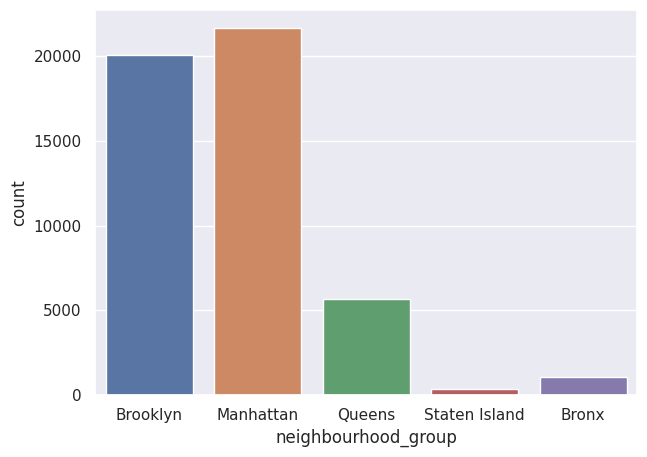

In [ ]:
category_summary(df,"neighbourhood_group",plot=True)

In [ ]:
def num_summary(dataframe,numerical_col, plot=False):
    quantiles = [0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          1.000000
40%          3.000000
50%          5.000000
60%          9.000000
70%         17.000000
80%         33.000000
90%         70.000000
95%        114.000000
99%        214.000000
max        629.000000
Name: number_of_reviews, dtype: float64


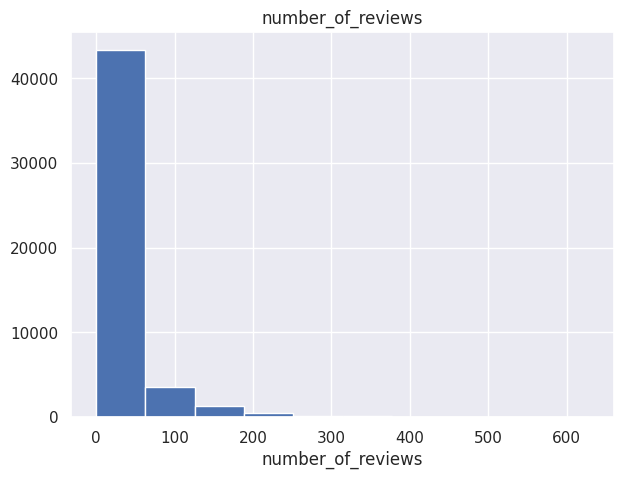

In [ ]:
num_summary(df,"number_of_reviews",plot=True)

               neighbourhood_group      Ratio
Manhattan                    21661  44.301053
Brooklyn                     20104  41.116679
Queens                        5666  11.588097
Bronx                         1091   2.231312
Staten Island                  373   0.762859
----------------------------------


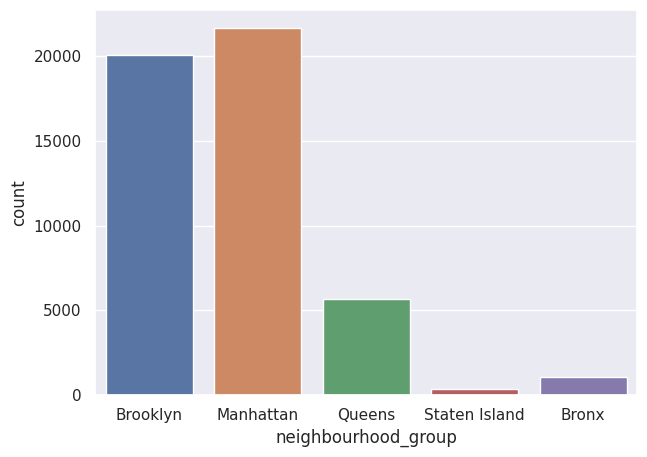

                 room_type      Ratio
Entire home/apt      25409  51.966459
Private room         22326  45.661111
Shared room           1160   2.372431
----------------------------------


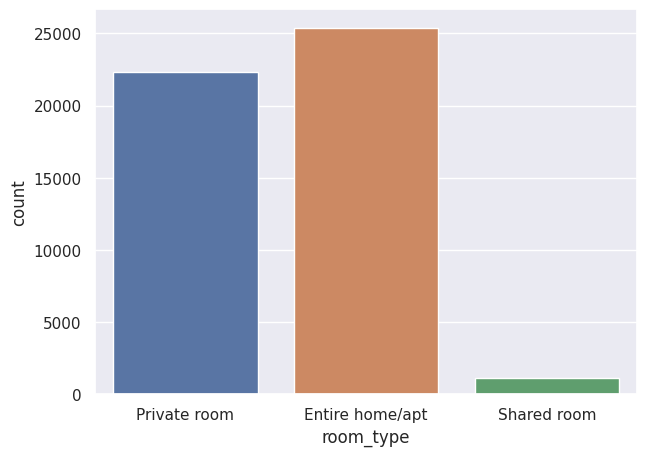

In [ ]:
for col in category_cols:
    category_summary(df,col,plot=True)

In [ ]:
df["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df.groupby("room_type").agg({"price": ["mean","count"]})

price       
                       mean  count
room_type                         
Entire home/apt  211.794246  25409
Private room      89.780973  22326
Shared room       70.127586   1160

In [ ]:
df.groupby("neighbourhood_group").agg({"price":["mean","count"]})

price       
                           mean  count
neighbourhood_group                   
Bronx                 87.496792   1091
Brooklyn             124.383207  20104
Manhattan            196.875814  21661
Queens                99.517649   5666
Staten Island        114.812332    373

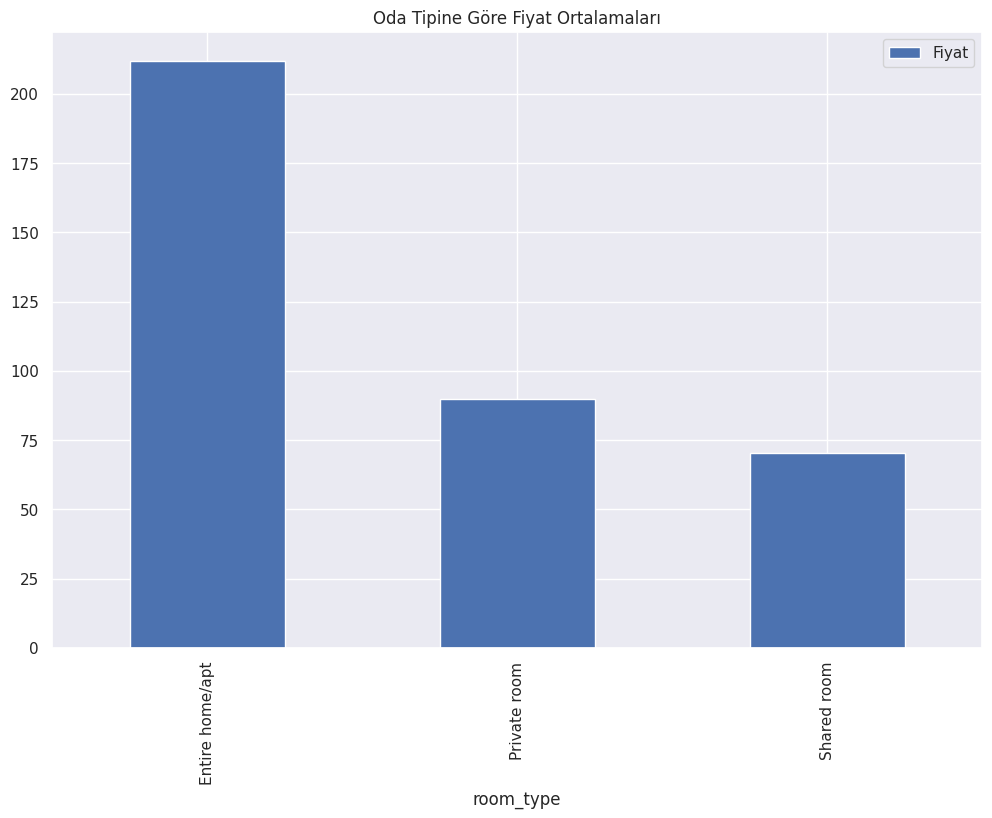

In [ ]:
df.groupby(["room_type"]).agg({"price":"mean"}).plot(kind="bar")
plt.title("Oda Tipine Göre Fiyat Ortalamaları")
plt.legend(["Fiyat"])

In [ ]:
df.groupby(["room_type"]).agg({"number_of_reviews":"mean"})

,number_of_reviews
room_type,
Entire home/apt,22.842418
Private room,24.112962
Shared room,16.600000


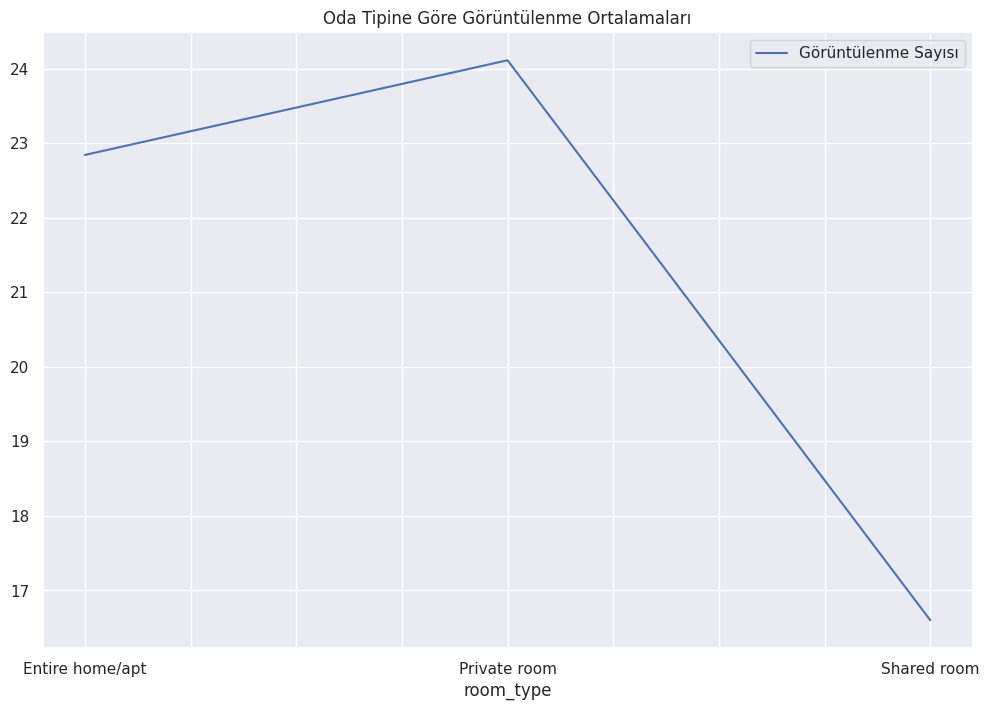

In [ ]:
df.groupby(["room_type"]).agg({"number_of_reviews":"mean"}).plot()
plt.title("Oda Tipine Göre Görüntülenme Ortalamaları")
plt.legend(["Görüntülenme Sayısı"])

In [ ]:
df["number_of_reviews"].sort_values(ascending=False)

11759    629
2031     607
2030     597
2015     594
13495    576
        ... 
12724      0
12721      0
12717      0
12716      0
48894      0
Name: number_of_reviews, Length: 48895, dtype: int64

In [ ]:
n = df.loc[:,"number_of_reviews"].max()

In [ ]:
df[df["number_of_reviews"] == n]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.6673,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333


Text(0.5, 1.0, 'Class Frequencies of Neighbourhood Group Variable')

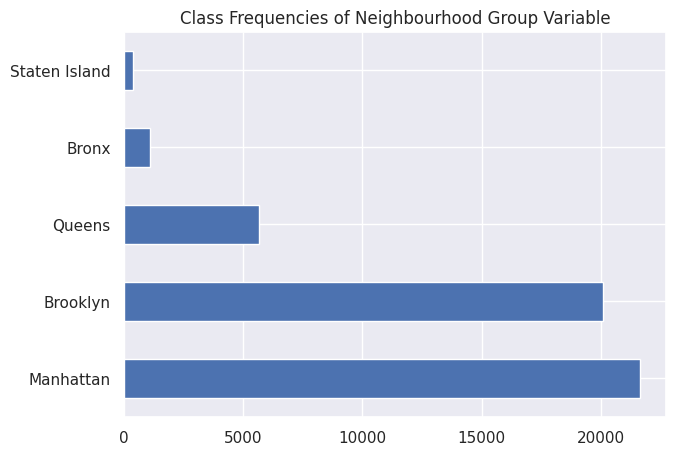

In [ ]:
df["neighbourhood_group"].value_counts().plot.barh().set_title("Class Frequencies of Neighbourhood Group Variable")

Text(0.5, 1.0, 'Class Frequencies of Neighbourhood Group Variable')

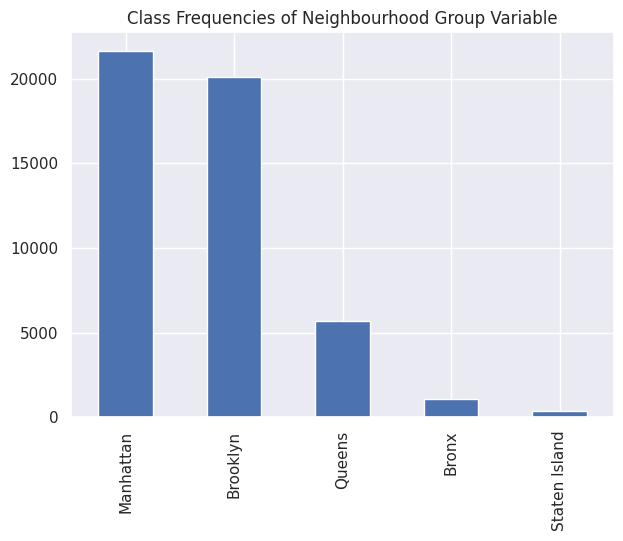

In [ ]:
df["neighbourhood_group"].value_counts().plot.bar().set_title("Class Frequencies of Neighbourhood Group Variable")

In [ ]:
df["neighbourhood_group"].index

RangeIndex(start=0, stop=48895, step=1)

Text(0.5, 1.0, 'Neighbourhood Group Density')

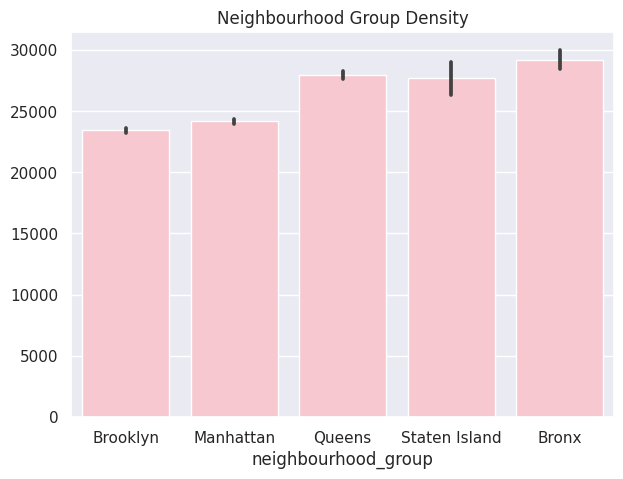

In [ ]:
sns.barplot(x="neighbourhood_group", y=df["neighbourhood_group"].index, data=df, color="pink").set_title("Neighbourhood Group Density")

Text(0.5, 1.0, 'Neighbourhood Group  - Price - Room Type')

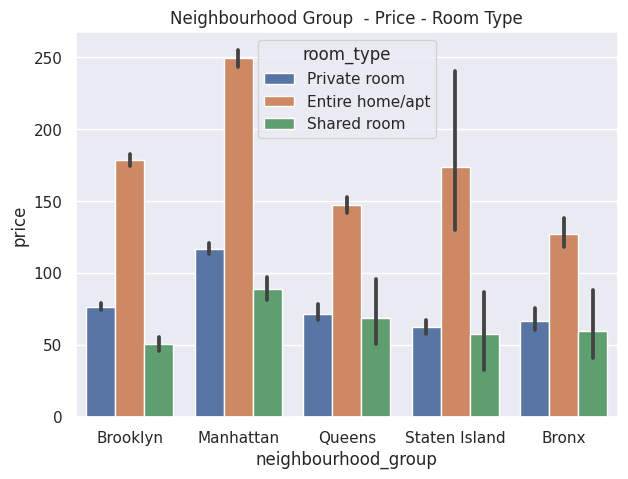

In [ ]:
sns.barplot(x="neighbourhood_group", y="price", hue="room_type", data=df)
plt.title("Neighbourhood Group  - Price - Room Type")

In [ ]:
name = df.groupby("host_name").agg({"number_of_reviews":"sum"}).reset_index()
name = name.sort_values("number_of_reviews",ascending=False)

Text(0.5, 1.0, 'En Çok Görüntülenme Alan 5 Ev Sahibi')

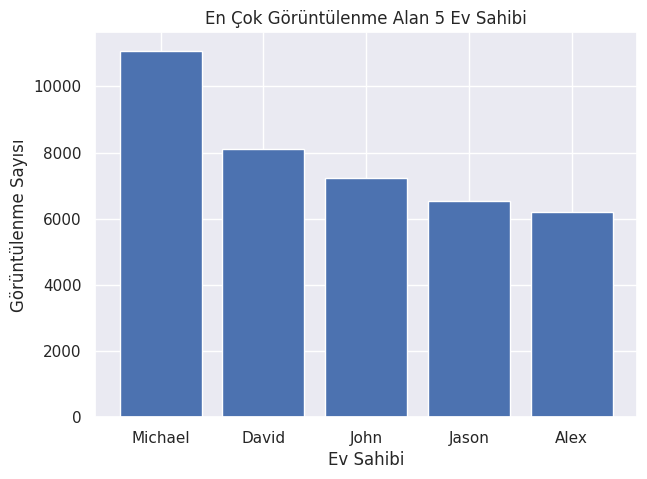

In [ ]:
plt.bar(name["host_name"][:5],name["number_of_reviews"][:5])
plt.xlabel("Ev Sahibi")
plt.ylabel("Görüntülenme Sayısı")
plt.title("En Çok Görüntülenme Alan 5 Ev Sahibi")

Text(0.5, 1.0, 'Görüntülenme ve Fiyat Dağılımı')

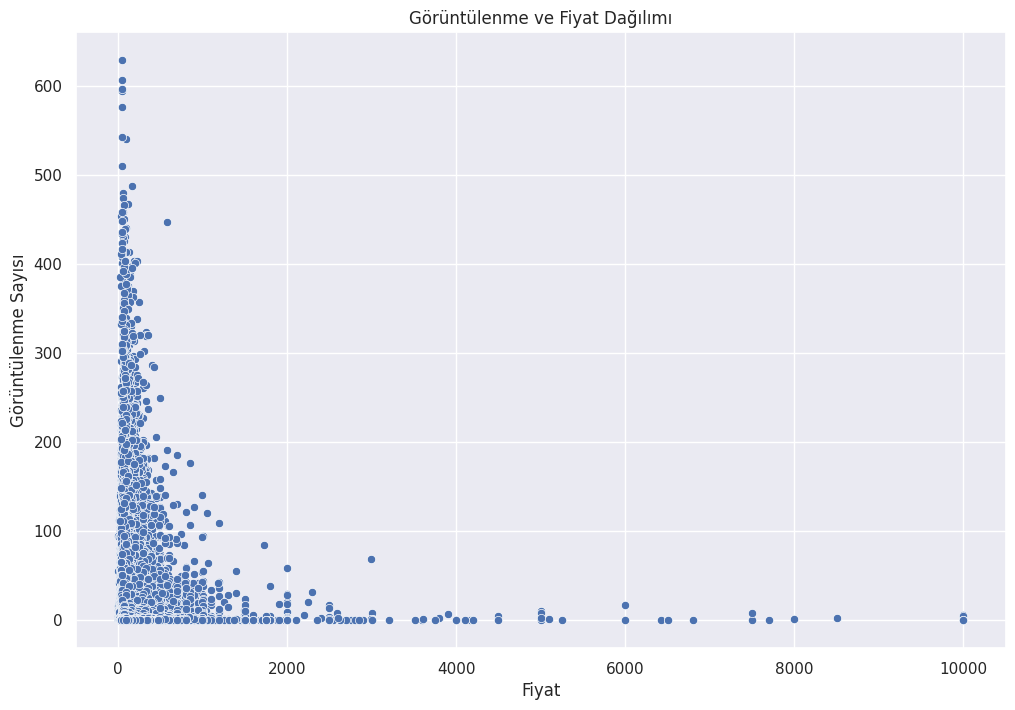

In [ ]:
sns.scatterplot(data=df, x='price', y='number_of_reviews')
plt.xlabel("Fiyat")
plt.ylabel("Görüntülenme Sayısı")
plt.title("Görüntülenme ve Fiyat Dağılımı")

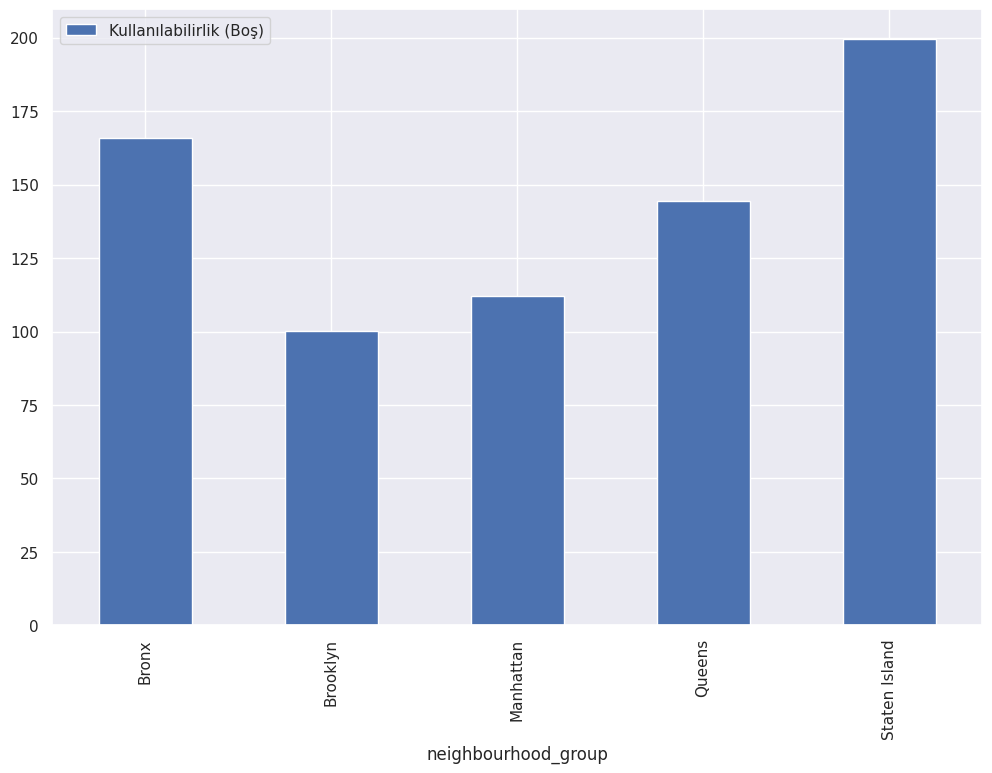

In [ ]:
df.groupby("neighbourhood_group").agg({"availability_365":"mean"}).plot(kind="bar")
plt.legend(['Kullanılabilirlik (Boş)'])

<ipython-input-111-45e11cbea9fe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))


Text(0.5, 1.0, 'Bölgelere Göre Fiyat Oranları')

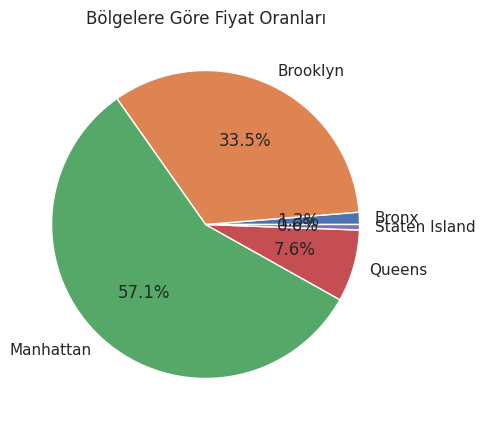

In [ ]:
df.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))
plt.title("Bölgelere Göre Fiyat Oranları")

<Axes: xlabel='price', ylabel='Count'>

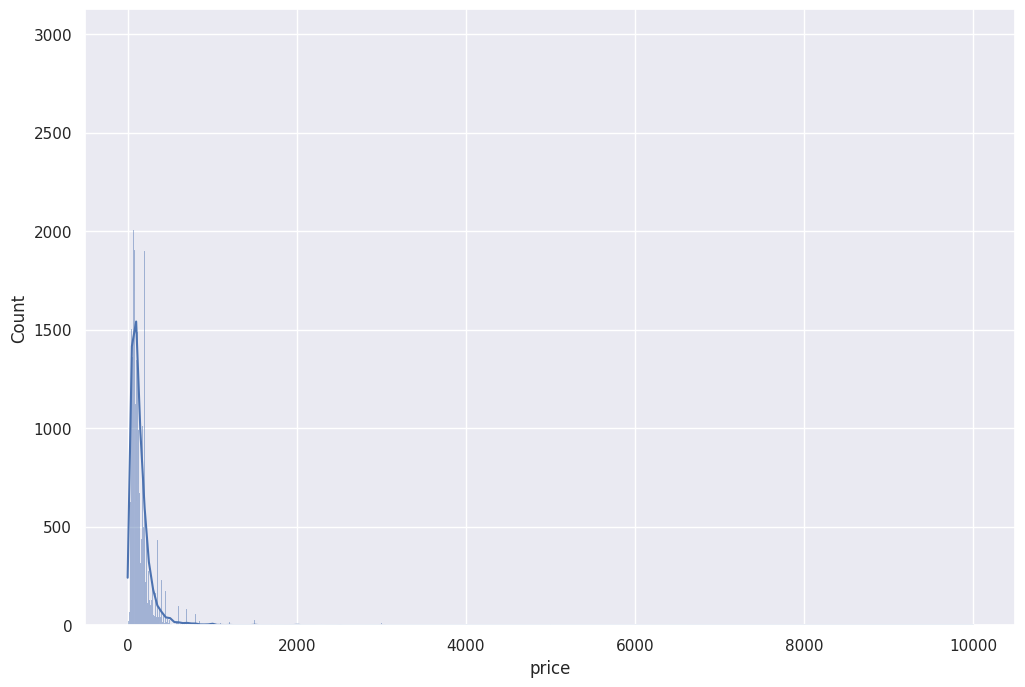

In [ ]:
sns.histplot(df["price"], kde=True, bins="auto")

<Axes: xlabel='price', ylabel='Density'>

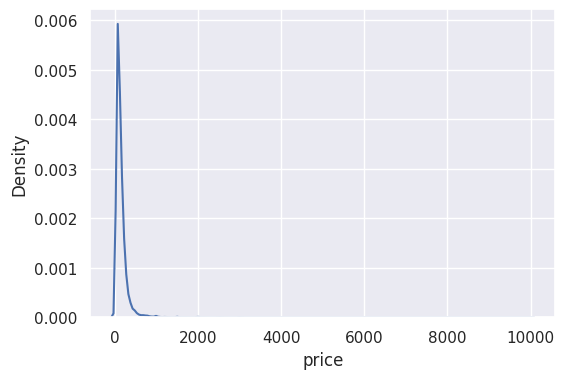

In [ ]:
sns.kdeplot(df["price"])

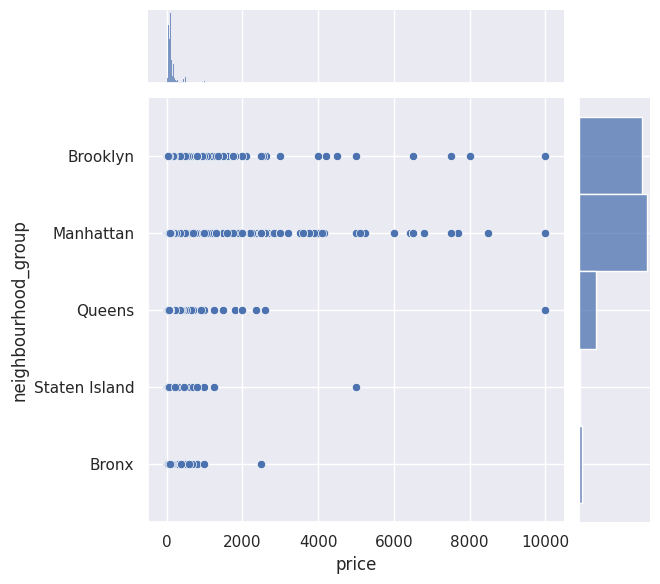

In [ ]:
sns.jointplot(x="price", y=df["neighbourhood_group"], data=df)

Text(-11.430555555555548, 0.5, 'Prices')

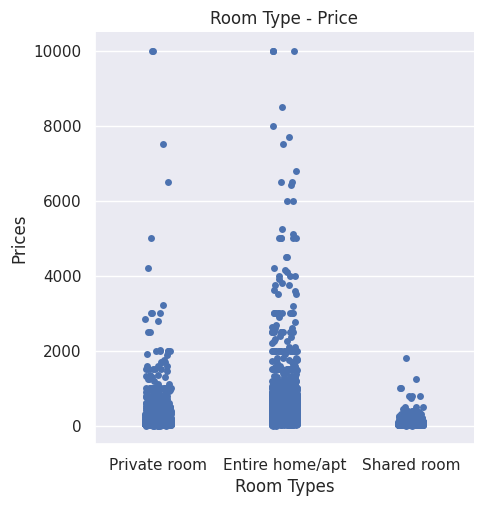

In [ ]:
sns.catplot(x="room_type", y="price", data=df)
plt.title("Room Type - Price")
plt.xlabel("Room Types")
plt.ylabel("Prices")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

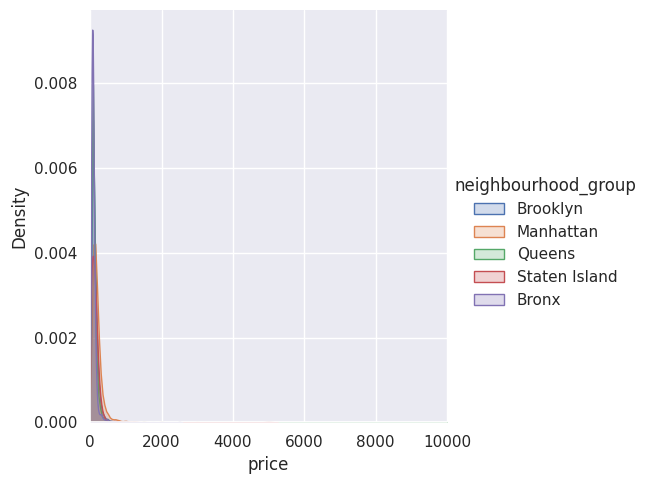

In [ ]:
(sns.FacetGrid(df, hue="neighbourhood_group", height=5, xlim=(0, 10000)).map(sns.kdeplot, "price", shade=True).add_legend())

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


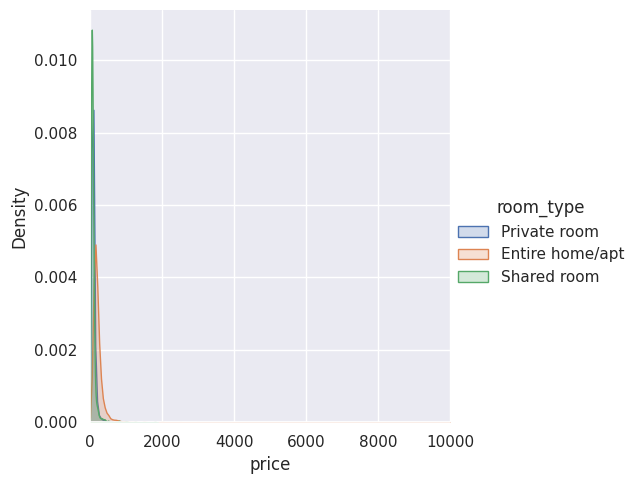

In [ ]:
(sns.FacetGrid(df, hue="room_type", height=5, xlim=(0, 10000)).map(sns.kdeplot, "price", shade=True).add_legend())

<ipython-input-98-c078bb934990>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


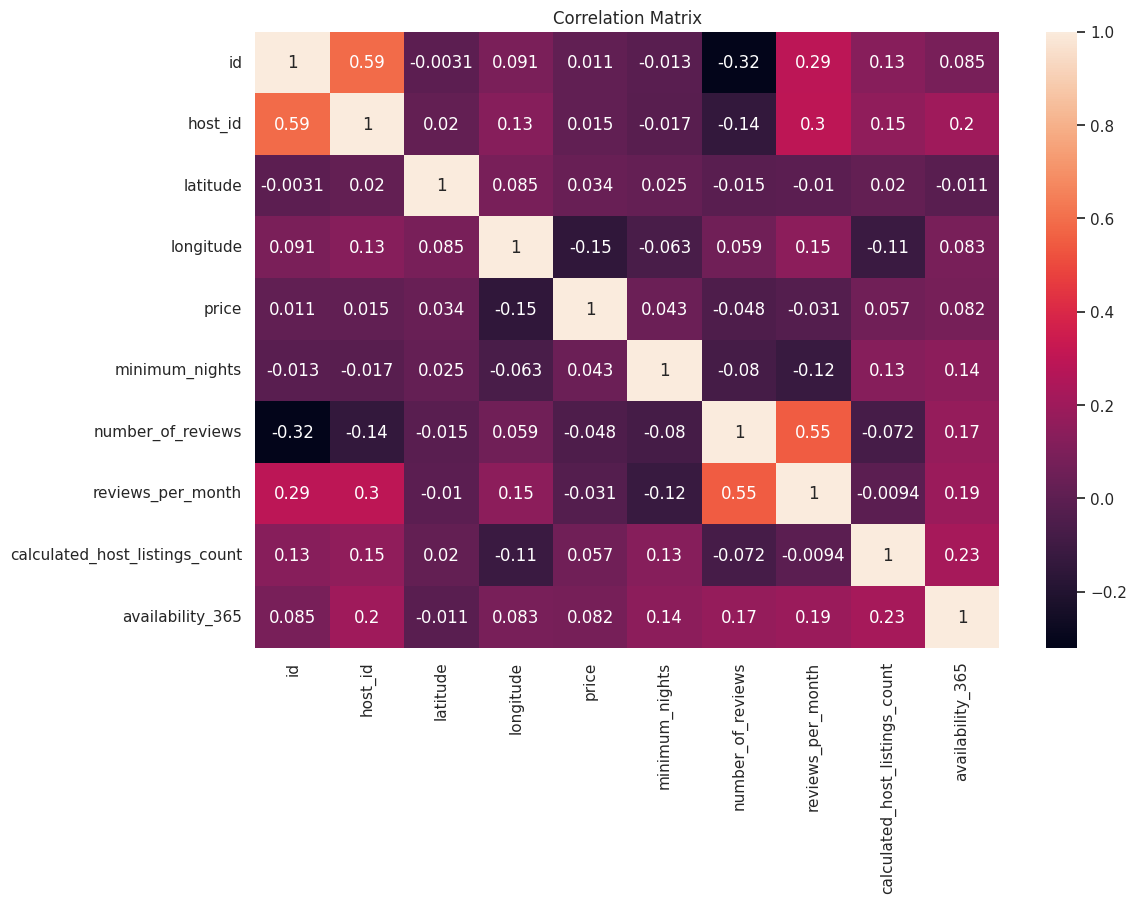

In [ ]:
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True);